# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [2]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [2]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

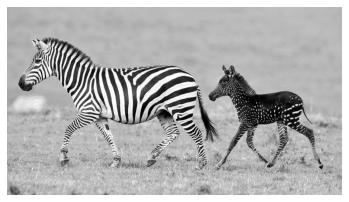

In [3]:
myimshow(zebra)

In [4]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

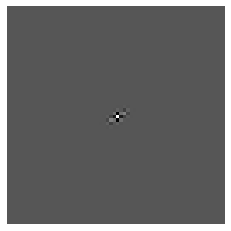

In [126]:
filter = genGabor((64,64),4,45)
myimshow(filter)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

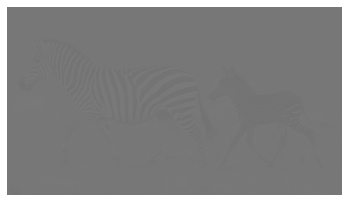

In [127]:
img_res = convolve(zebra,filter)
myimshow(img_res)
#Questo filtro permette di individuare particolari texture nell'immagine, come vediamo nell'esempio vengono evidenziate le strisce della zebra.

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

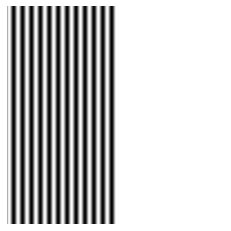

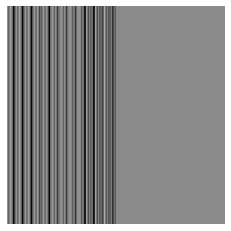

In [123]:
gab = rgb2gray(imageio.imread('gabor1.jpg'))
myimshow(gab)
filter_v = genGabor((64,64),5,120)
gab_res = convolve(gab,filter_v)
myimshow(gab_res)

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

In [4]:
from skimage import filters
sobelv = filters.sobel_v(gab)
myimshow(sobelv)
#Il modo più semplice per individuare i contorni è il filtro di sobel verticale poichè agisce nella direzione che ci serve

NameError: ignored

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

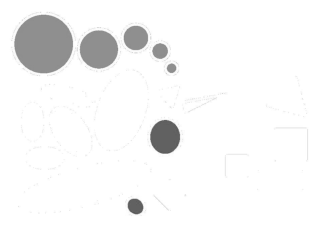

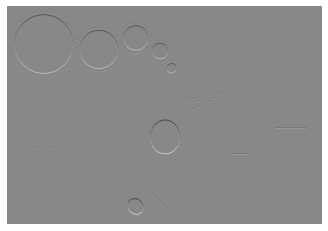

In [40]:
cerchi = rgb2gray(imageio.imread('cerchi.jpg'))
myimshow(cerchi)
sobelh = filters.sobel_h(cerchi)
myimshow(sobelh)

# Esercizio 3

Spiegare e mostrare con un esempio numerico i vantaggi e gli svantaggi di applicare un filtro 5x5 oppure due filtri 5x1 e 1x5 in sequenza. 

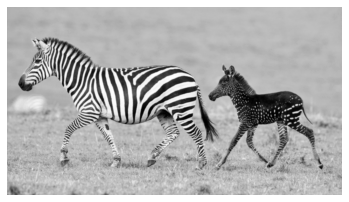

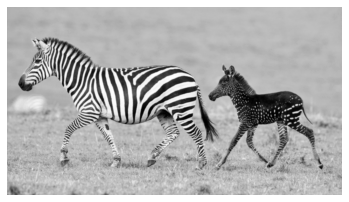

In [24]:
#Per entrambi gli approcci non cambia il risultato, la differenza è che nel caso dei due filtri in sequenza abbiamo un guadagno in termini computazionali perchè facciamo convoluzioni su una sola dimensione in sequenza, lo svantaggio è che dobbiamo memorizzare la matrice intermedia
#Complessità temporale applicazione filtro 2D: O(N^2*M^2) con un immagine N x N e un filtro M x M
#Complessità temporale applicazione due filtri 1D: O(N^2*M) con un immagine N x N e un filtro M x M
import cv2
es3 = rgb2gray(imageio.imread('zebra.jpg'))
f1 = cv2.GaussianBlur(es3,(5,5),cv2.BORDER_DEFAULT)
f2 = cv2.GaussianBlur(es3,(5,1),cv2.BORDER_DEFAULT)
f3 = cv2.GaussianBlur(f2,(1,5),cv2.BORDER_DEFAULT)
myimshow(f1)
myimshow(f3)

# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough segnandoli con una X

![](forme.jpg)

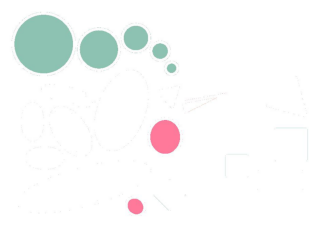

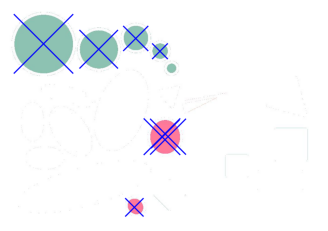

In [55]:
import skimage
img_circles_color = imageio.imread('cerchi.jpg')
img_circles_1 = rgb2gray(imageio.imread('cerchi.jpg'))
img_circles_blur = cv2.GaussianBlur(img_circles_1, (31, 31), 5)
img = skimage.img_as_ubyte(img_circles_blur)
#Hough transform
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=10, param1=50, param2=30, minRadius=10, maxRadius=100)
circles = np.uint16(np.around(circles_float))
circles = np.squeeze(circles)
circles = circles[circles[:,0].argsort()]
img_circles = np.copy(img_circles_color)
for i in range(circles.shape[0]):
  c = (circles[i, 0], circles[i, 1])
  r = circles[i, 2]
  cv2.line(img_circles,c,(c[0]+r,c[1]+r), (0,0, 255), 3)
  cv2.line(img_circles,c,(c[0]+r,c[1]-r), (0,0, 255), 3)
  cv2.line(img_circles,c,(c[0]-r,c[1]-r), (0,0, 255), 3)
  cv2.line(img_circles,c,(c[0]-r,c[1]+r), (0,0, 255), 3)
myimshow(img_circles_color)
myimshow(img_circles)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 45° in senso orario in (5, 5) e una traslazione di 50 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

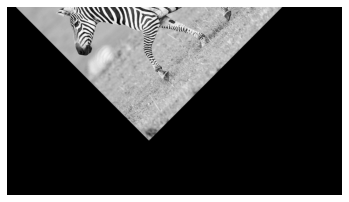

In [32]:
es5 = rgb2gray(imageio.imread('zebra.jpg'))
lx,ly = es5.shape
#Definire la matrice di traslazione per spostarci di 50 px sull'asse x
T = np.float32([[1,0,50],[0,1,0]])
#Definire la matrice di rotazione per ruotare di 45 gradi centrata in (5,5)
R = cv2.getRotationMatrix2D((5,5),45,1)
#Applico rotazione
res1 = cv2.warpAffine(es5,R,(ly,lx))
#Applico traslazione
res2 = cv2.warpAffine(res1,T,(ly,lx))
myimshow(res2)